In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
import seaborn as sns
import keras
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D ,Dropout
from keras.initializers import glorot_uniform
from keras.models import Model,load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model
from keras.preprocessing import image
from PIL import Image

#Loading the CIFAR_10 Dataset

In [50]:
cifar10=keras.datasets.cifar10

In [51]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [52]:
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


##Defining parameters and Hyperparameters

In [60]:
num_classes=10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
hyperparameters={
    "batch_size" : 32,
    "epochs" : 50,
    "data_augmentation" : True
}

##Normalization

In [54]:
X_train=X_train/255.
X_test=X_test/255.

##Converting out to categorical form

In [55]:
Y_train=keras.utils.to_categorical(Y_train,num_classes)
Y_test=keras.utils.to_categorical(Y_test,num_classes)


##Analyzing the data

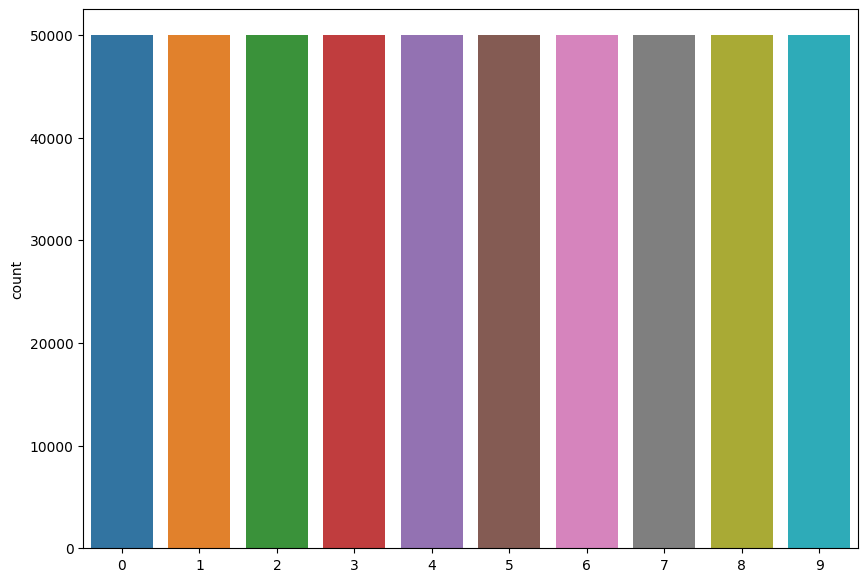

In [56]:
plt.figure(figsize=(10,7))
p = sns.countplot(Y_train)
p.set_xticklabels=classes
plt.show()

In [57]:
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())

False
False


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


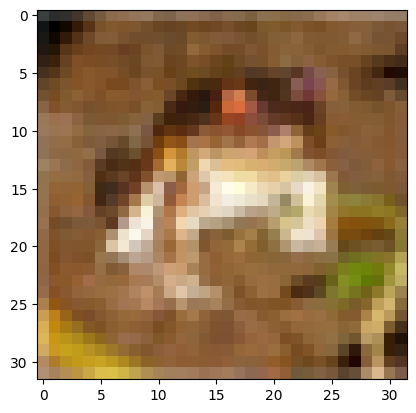

In [58]:
plt.imshow(X_train[0])
print(Y_train[0])

In [59]:
def MODEL(input_shape=(32,32,3),num_classes=10):
  X_Input=Input(input_shape)

  X=ZeroPadding2D((3,3))(X_Input)

  X_Shortcut=X

  #Stage 1
  X=Conv2D(32,(4,4),strides=(1,1),padding='valid',name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name="batch1")(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((2,2))(X)

  #Stage 2
  X=Conv2D(64,(1,1),strides=(1,1),padding='valid',name='conv2',kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name="batch2")(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((2,2))(X)

  #Shortcut Connection
  X_Shortcut=Conv2D(64,(5,5),strides=(2,2),padding='valid',name='shortcut1',kernel_initializer=glorot_uniform(seed=0))(X_Shortcut)
  X_Shortcut=BatchNormalization(axis=3,name="batch_Shortcut")(X_Shortcut)
  X_Shortcut=Activation('relu')(X_Shortcut)
  X_Shortcut=MaxPooling2D((2,2))(X_Shortcut)

  #Adding Shortcut
  X=Add()([X,X_Shortcut])
  X=Activation('relu')(X)

  X=Dropout(0.25)(X)

  #Stage 3
  X=Conv2D(128,(3,3),strides=(1,1),padding='valid',name='conv3',kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name="batch3")(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((2,2))(X)

  X=Flatten()(X)
  X=Dense(256,activation='relu',name='fc1',kernel_initializer=glorot_uniform(seed=0))(X)
  X=Dense(num_classes,activation='softmax',name='final',kernel_initializer=glorot_uniform(seed=0))(X)

  model=Model(inputs=X_Input,outputs=X,name='model2')

  return model




In [46]:
model=MODEL()

In [48]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [61]:
if not hyperparameters['data_augmentation']:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,batch_size=hyperparameters['batch_size'],epochs=hyperparameters['epochs'])

else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    datagen.fit(X_train)

    model.fit_generator(datagen.flow(X_train, Y_train,batch_size=hyperparameters['batch_size']),epochs=hyperparameters['epochs'])

Using real-time data augmentation.
Epoch 1/50


<ipython-input-61-8de3c4bdc6d0>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, Y_train,batch_size=hyperparameters['batch_size']),epochs=hyperparameters['epochs'])


1563/1563 [==============================] - 193s 121ms/step - loss: 1.6243 - accuracy: 0.4102
Epoch 2/50
1563/1563 [==============================] - 169s 108ms/step - loss: 1.3533 - accuracy: 0.5104
Epoch 3/50
1563/1563 [==============================] - 164s 105ms/step - loss: 1.2275 - accuracy: 0.5582
Epoch 4/50
1563/1563 [==============================] - 163s 104ms/step - loss: 1.1459 - accuracy: 0.5919
Epoch 5/50
1563/1563 [==============================] - 163s 104ms/step - loss: 1.0882 - accuracy: 0.6159
Epoch 6/50
1563/1563 [==============================] - 163s 104ms/step - loss: 1.0407 - accuracy: 0.6326
Epoch 7/50
1563/1563 [==============================] - 161s 103ms/step - loss: 1.0060 - accuracy: 0.6462
Epoch 8/50
1563/1563 [==============================] - 164s 105ms/step - loss: 0.9691 - accuracy: 0.6600
Epoch 9/50
1563/1563 [==============================] - 165s 106ms/step - loss: 0.9462 - accuracy: 0.6685
Epoch 10/50
1563/1563 [==============================] - 

In [62]:
model.summary()

Model: "model2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 zero_padding2d_21 (ZeroPad  (None, 38, 38, 3)            0         ['input_22[0][0]']            
 ding2D)                                                                                          
                                                                                                  
 conv1 (Conv2D)              (None, 35, 35, 32)           1568      ['zero_padding2d_21[0][0]']   
                                                                                                  
 batch1 (BatchNormalization  (None, 35, 35, 32)           128       ['conv1[0][0]']          

In [64]:
preds=model.evaluate(X_test,Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 16s 47ms/step - loss: 0.6368 - accuracy: 0.7854
Loss = 0.6367670893669128
Test Accuracy = 0.7853999733924866


Input image shape: (1, 32, 32, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5), p(6), p(7), p(8), p(9)] = 
1/1 [==============================] - 0s 27ms/step
[[1.8233885e-03 9.0656849e-04 9.7426921e-01 6.1542593e-04 1.2091714e-03
  1.3321887e-04 1.5267424e-02 1.0853081e-03 2.8240425e-03 1.8661777e-03]]
bird


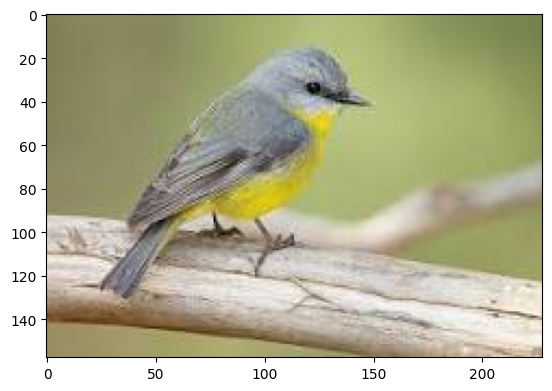

In [74]:
img_path = 'bird1.jpeg'
img = image.load_img(img_path, target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
my_image = Image.open(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5), p(6), p(7), p(8), p(9)] = ")
ans=model.predict(x)
print(ans)
print(classes[np.argmax(ans)])

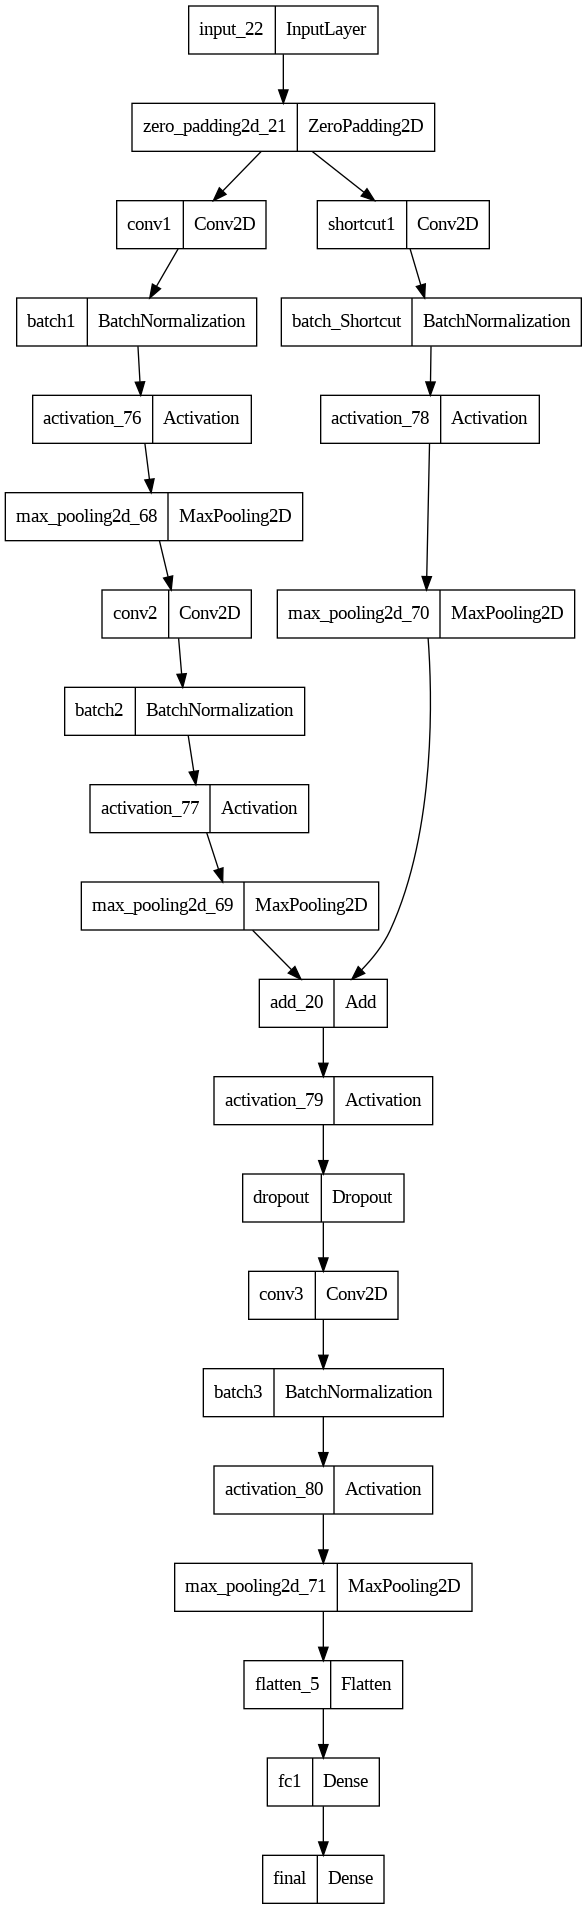

In [75]:
plot_model(model, to_file='model2.png')